In [101]:
#Import libraries
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

#Read in data
df = pd.read_csv("forestfires.csv") 

In [102]:
#Qucik look at basic summary stats
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [103]:
#Define a new column that indicates whether or not there was a fire greater than 0. Will
#use this to train a classsifier before regression.
def f(row):
    if row['area'] == 0:
        val = 0
    else:
        val = 1
    return val

df['fire'] = df.apply(f, axis=1)

#Create a log transformed area to do regression analysis with.
df['logArea'] = np.log(df.area + 1)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire,logArea
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0.0


In [111]:
#Define predictor and target variables
X = df[df.columns[0:12]]
X = pd.get_dummies(X)
X = X._get_numeric_data()
y = df[df.columns[13:14]]

#Create train and test data sets for classificattion
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [105]:
##Create several classification models to find best one to determine whether or not a fire of 
#greater than size 0 occured.

#Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#SVC classifier
svcClf = svm.SVC()
svcClf.fit(X_scaled,y_train.values.ravel())
y_pred_svc = svcClf.predict(X_test)

#Knn classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_scaled, y_train.values.ravel())
y_pred_knn = knn.predict(X_test)

#Random forest classifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_scaled,y_train.values.ravel())
y_pred_rf = rf.predict(X_test)

svc results
[[32 24]
 [34 40]]
SVC accuracy: 0.46923076923076923
SVC Precision:  0.5384615384615384
SVC Recall:  0.47297297297297297

knn results
[[ 5 51]
 [ 9 65]]
knn accuracy: 0.4846153846153846
Knn Precision:  0.5443037974683544
Knn Recall:  0.581081081081081

random forest results
[[ 1 55]
 [ 0 74]]
rf accuracy: 0.5538461538461539
rf Precision:  0.625
rf Recall:  0.5405405405405406


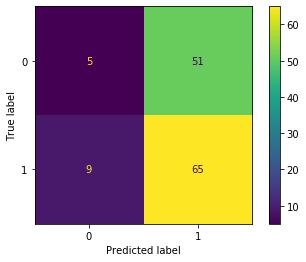

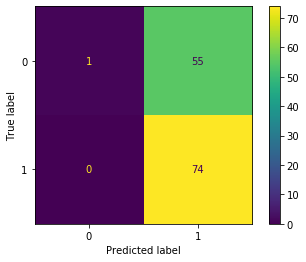

In [112]:
#Visualize results of classification tasks

print("svc results")
disp = plot_confusion_matrix(svcClf, X_test, y_test)
print(disp.confusion_matrix) 
print("SVC accuracy:", accuracy_score(y_test,y_pred_svc))
precisionsvc = precision_score(y_test, y_pred_svc)
recallsvc = recall_score(y_test, y_pred_svc)
print('SVC Precision: ',precisionsvc)
print('SVC Recall: ',recallsvc)



print("\nknn results")
disp = plot_confusion_matrix(knn, X_test, y_test)
print(disp.confusion_matrix) 
print("knn accuracy:", accuracy_score(y_test,y_pred_knn))
precisionknn = precision_score(y_test, y_pred_knn)
recallknn = recall_score(y_test, y_pred_knn)
print('Knn Precision: ',precisionknn)
print('Knn Recall: ',recallknn)


print("\nrandom forest results")
disp = plot_confusion_matrix(rf, X_test, y_test)
print(disp.confusion_matrix) 
print("rf accuracy:", accuracy_score(y_test,y_pred_rf))
precisionrf = precision_score(y_test, y_pred_rf)
recallrf = recall_score(y_test, y_pred_rf)
print('rf Precision: ',precisionrf)
print('rf Recall: ',recallrf)

In [143]:
#Create new dataset with no 0s in fire area. Run regression on this.
dfFires = df.loc[df['area'] >0]

#Create predictor and target (Log Area) variables for this dataset

X = dfFires[dfFires.columns[0:12]]
X = pd.get_dummies(X)
X = X._get_numeric_data()
y = dfFires[dfFires.columns[14:15]]

#Create train and test data sets for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

Text(0.5, 1.0, 'MSE of test data at each depth')

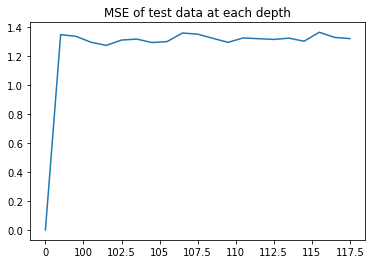

In [144]:
mseList = [0]
for i in range (100,120):
    forestReg = ensemble.RandomForestRegressor(n_estimators = i)

    forestReg.fit(X_train, y_train.values.ravel())
    y_pred = forestReg.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_pred)
    mseList.append(mse)
   
f, ax = plt.subplots()
plt.plot(mseList)
ax.set_xticklabels(["0", "0", "100", "102.5", "105", "107.5", "110", "112.5", "115", "117.5"])
plt.title("MSE of test data at each depth")

RMSE =  1.3989868675690376
R^2 = 0.4255332316350008


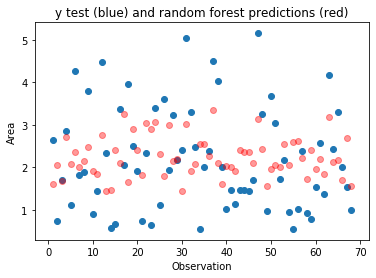

In [146]:
from sklearn import ensemble

#Random forest regression now

forestReg = ensemble.RandomForestRegressor(n_estimators = 100)

forestReg.fit(X_train, y_train.values.ravel())
y_pred = forestReg.predict(X_test)


n_scores = cross_val_score(forestReg, X_test, y_test.values.ravel(), scoring='neg_root_mean_squared_error')
print("RMSE = ", (np.mean(n_scores)*-1))
#Does not predict 0 as well but predicts high values slightly better
x = range(1,len(y_test) + 1)

plt.scatter(x, y_test)
plt.scatter(x, y_pred, color = "red", alpha = 0.4)
plt.ylabel('Area')
plt.xlabel('Observation')
plt.title("y test (blue) and random forest predictions (red)")

n_scores = cross_val_score(forestReg, X_test, y_test.values.ravel(), scoring='r2')
print("R^2 =",np.mean(n_scores)*-1)